In [3]:
import os
import pandas as pd

In [43]:
folder = "D:\Tinu Project\Projects Files Excel"
file = "auto_clean.csv"

data = os.path.join(folder,file)
df = pd.read_csv(data)

print(df.head())


   symboling  normalized-losses         make aspiration num-of-doors  \
0          3                122  alfa-romero        std          two   
1          3                122  alfa-romero        std          two   
2          1                122  alfa-romero        std          two   
3          2                164         audi        std         four   
4          2                164         audi        std         four   

    body-style drive-wheels engine-location  wheel-base    length  ...  \
0  convertible          rwd           front        88.6  0.811148  ...   
1  convertible          rwd           front        88.6  0.811148  ...   
2    hatchback          rwd           front        94.5  0.822681  ...   
3        sedan          fwd           front        99.8  0.848630  ...   
4        sedan          4wd           front        99.4  0.848630  ...   

   compression-ratio  horsepower  peak-rpm city-mpg highway-mpg    price  \
0                9.0       111.0    5000.0    

In [44]:
# missing values 
missing_values = df.isnull().sum()
print(missing_values)

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    1
diesel               0
gas                  0
dtype: int64


In [81]:
df['stroke'].fillna(df['stroke'].mean(), inplace=True)
df['horsepower-binned'].fillna(df['horsepower-binned'].mode()[0], inplace=True)

print(df.isnull().sum())

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    0
diesel               0
gas                  0
high-price           0
dtype: int64


C:\Users\mohit\AppData\Local\Temp\ipykernel_8508\863287631.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['stroke'].fillna(df['stroke'].mean(), inplace=True)
C:\Users\mohit\AppData\Local\Temp\ipykernel_8508\863287631.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [82]:
summary_stats = df.describe()
print(summary_stats)


        symboling  normalized-losses        make  aspiration  num-of-doors  \
count  201.000000          201.00000  201.000000  201.000000    201.000000   
mean     0.840796          122.00000   12.298507    0.179104      0.427861   
std      1.254802           31.99625    6.253035    0.384397      0.496004   
min     -2.000000           65.00000    0.000000    0.000000      0.000000   
25%      0.000000          101.00000    8.000000    0.000000      0.000000   
50%      1.000000          122.00000   12.000000    0.000000      0.000000   
75%      2.000000          137.00000   19.000000    0.000000      1.000000   
max      3.000000          256.00000   21.000000    1.000000      1.000000   

       body-style  drive-wheels  engine-location  wheel-base      length  ...  \
count  201.000000    201.000000       201.000000  201.000000  201.000000  ...   
mean     2.616915      1.333333         0.014925   98.797015    0.837102  ...   
std      0.864588      0.550757         0.121557    6.

In [91]:
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)

# Convert columns to categorical data types
categorical_columns = ['make', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
                       'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system',
                       'diesel', 'gas']

df[categorical_columns] = df[categorical_columns].astype('category')

# Calculate frequency distributions for each categorical column
for col in categorical_columns:
    print(f"Frequency distribution for {col}:")
    print(df[col].value_counts())
    print("categoricsl-columns \n")

# Check data types and unique values
for col in categorical_columns:
    print(f"Column: {col}")
    print(df[col].dtype)
    print(df[col].unique())
    print()


Categorical Columns: Index([], dtype='object')
Frequency distribution for make:
make
19    32
12    18
8     17
11    13
5     13
20    12
18    12
13    11
21    11
4      9
9      8
2      8
14     7
1      6
17     6
15     4
7      3
3      3
0      3
6      2
16     2
10     1
Name: count, dtype: int64
categoricsl-columns 

Frequency distribution for aspiration:
aspiration
0    165
1     36
Name: count, dtype: int64
categoricsl-columns 

Frequency distribution for num-of-doors:
num-of-doors
0    115
1     86
Name: count, dtype: int64
categoricsl-columns 

Frequency distribution for body-style:
body-style
3    94
2    68
4    25
1     8
0     6
Name: count, dtype: int64
categoricsl-columns 

Frequency distribution for drive-wheels:
drive-wheels
1    118
2     75
0      8
Name: count, dtype: int64
categoricsl-columns 

Frequency distribution for engine-location:
engine-location
0    198
1      3
Name: count, dtype: int64
categoricsl-columns 

Frequency distribution for engine-type:


In [92]:
# Clean non-numeric values in columns that should be numeric
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

# Convert categorical columns to strings if needed
df[categorical_columns] = df[categorical_columns].astype(str)


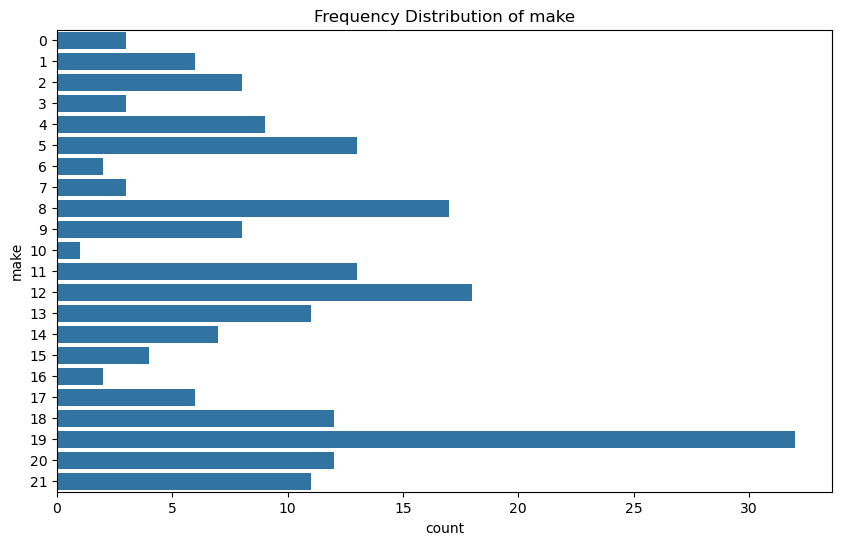

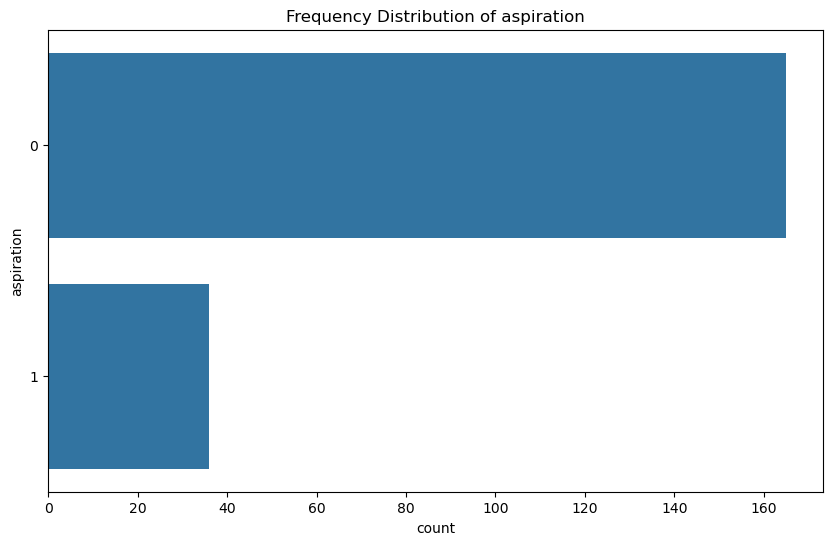

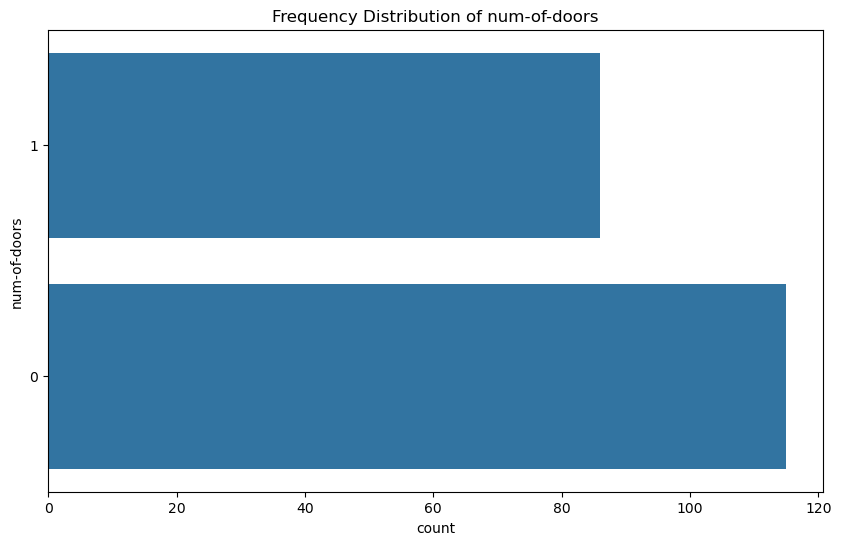

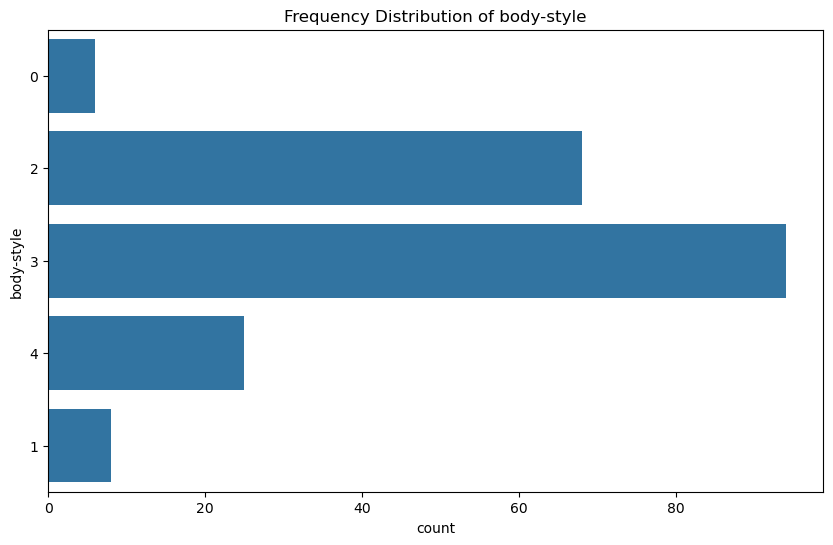

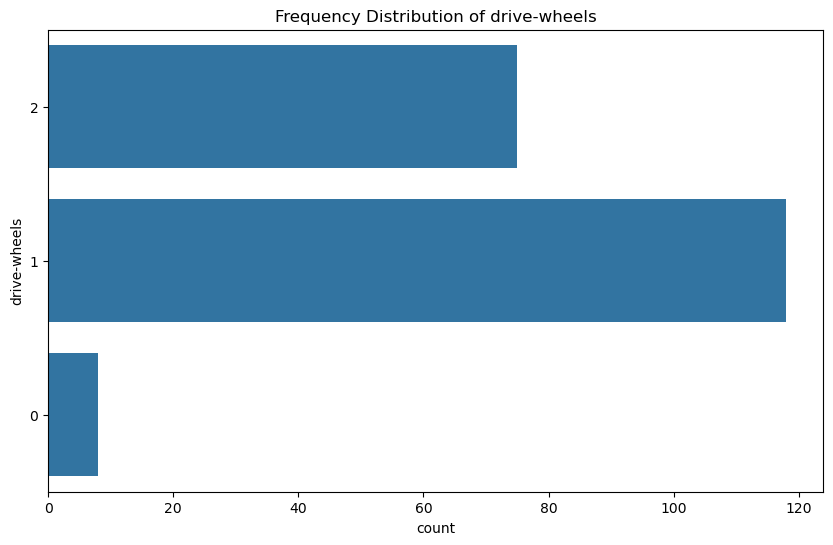

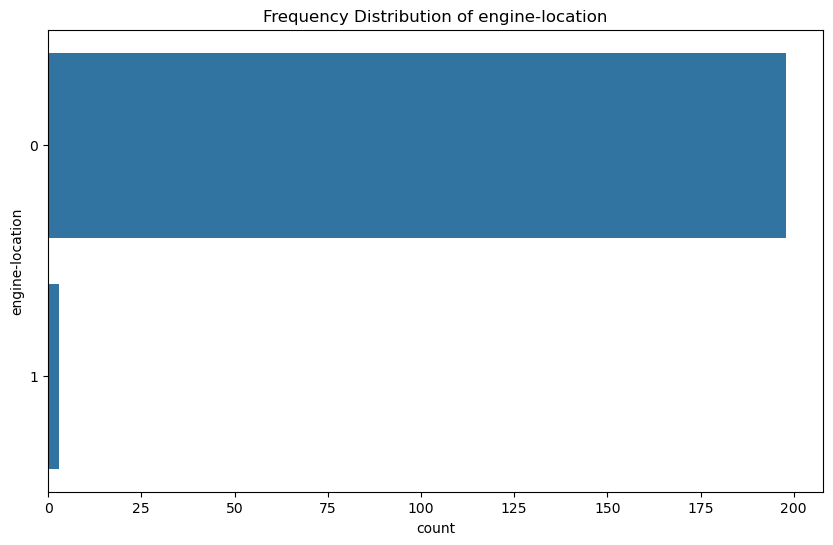

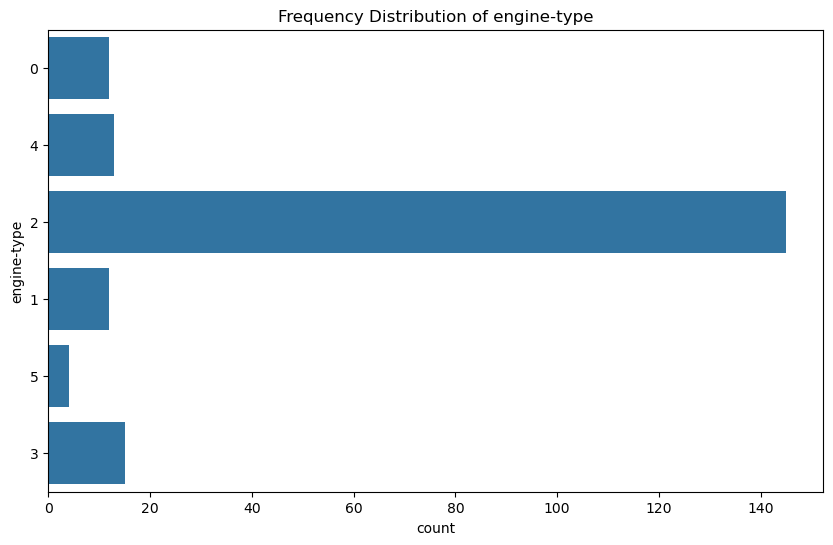

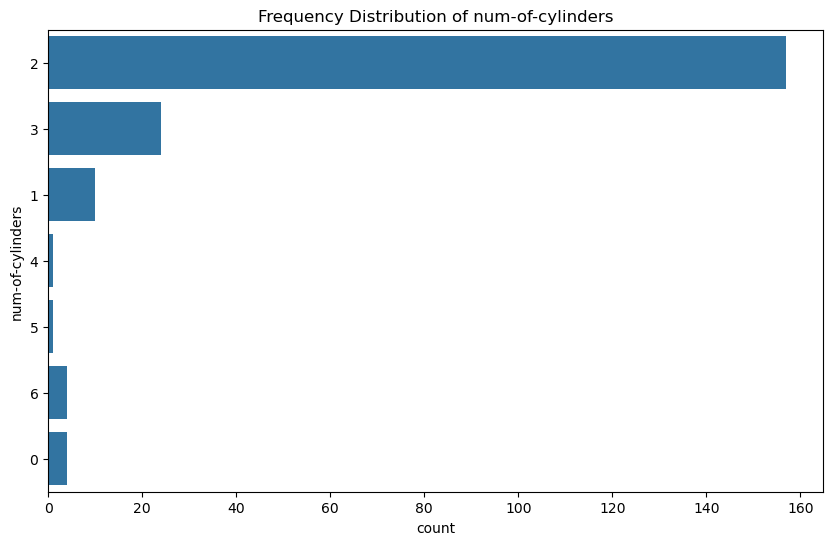

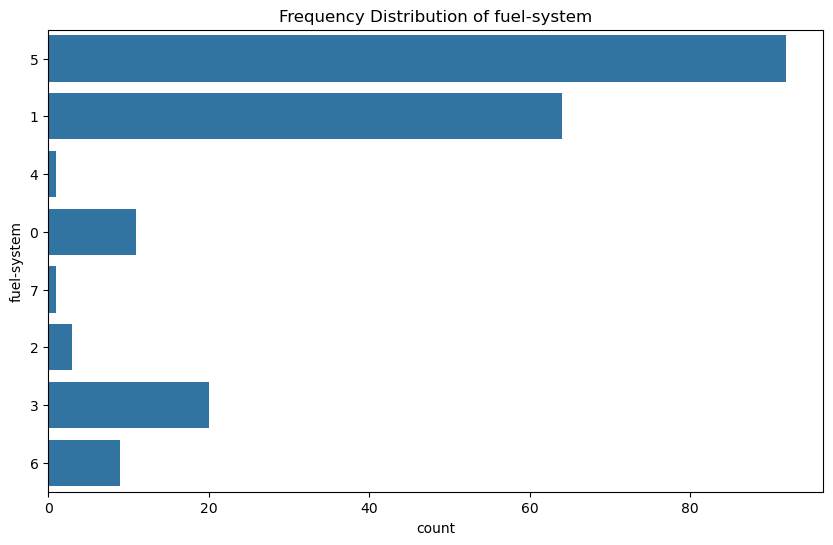

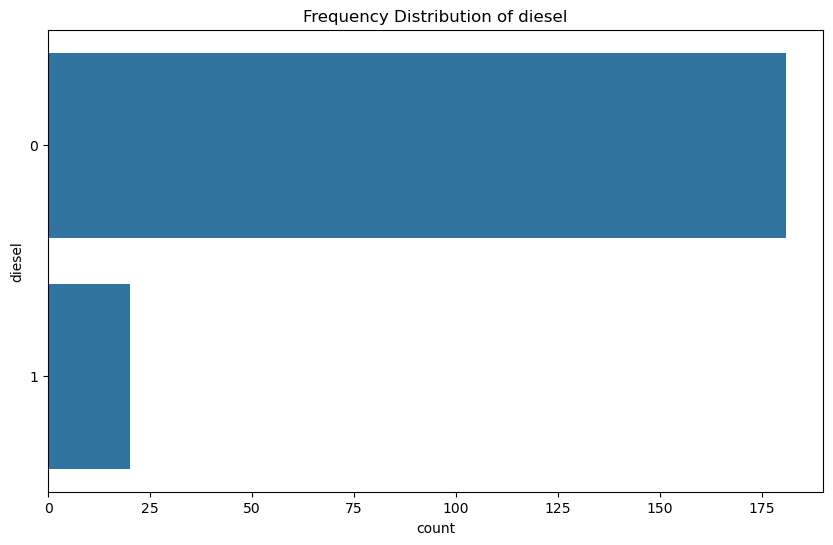

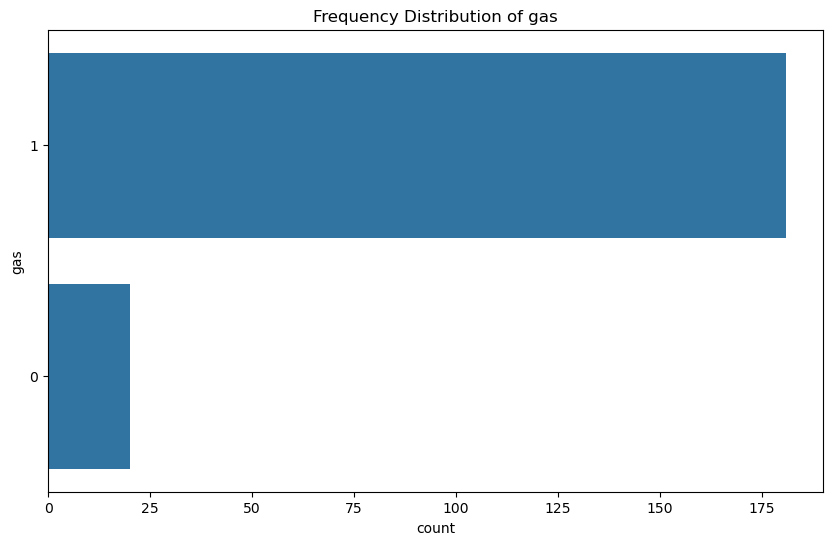

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot frequency distributions
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df[col])
    plt.title(f'Frequency Distribution of {col}')
    plt.show()


                   symboling  normalized-losses  wheel-base    length  \
symboling           1.000000           0.466264   -0.535987 -0.365404   
normalized-losses   0.466264           1.000000   -0.056661  0.019424   
wheel-base         -0.535987          -0.056661    1.000000  0.876024   
length             -0.365404           0.019424    0.876024  1.000000   
width              -0.242423           0.086802    0.814507  0.857170   
height             -0.550160          -0.373737    0.590742  0.492063   
curb-weight        -0.233118           0.099404    0.782097  0.880665   
engine-size        -0.110581           0.112360    0.572027  0.685025   
bore               -0.140019          -0.029862    0.493244  0.608971   
stroke             -0.007992           0.055127    0.157964  0.123913   
compression-ratio  -0.182196          -0.114713    0.250313  0.159733   
horsepower          0.075819           0.217299    0.371147  0.579821   
peak-rpm            0.279740           0.239543   -

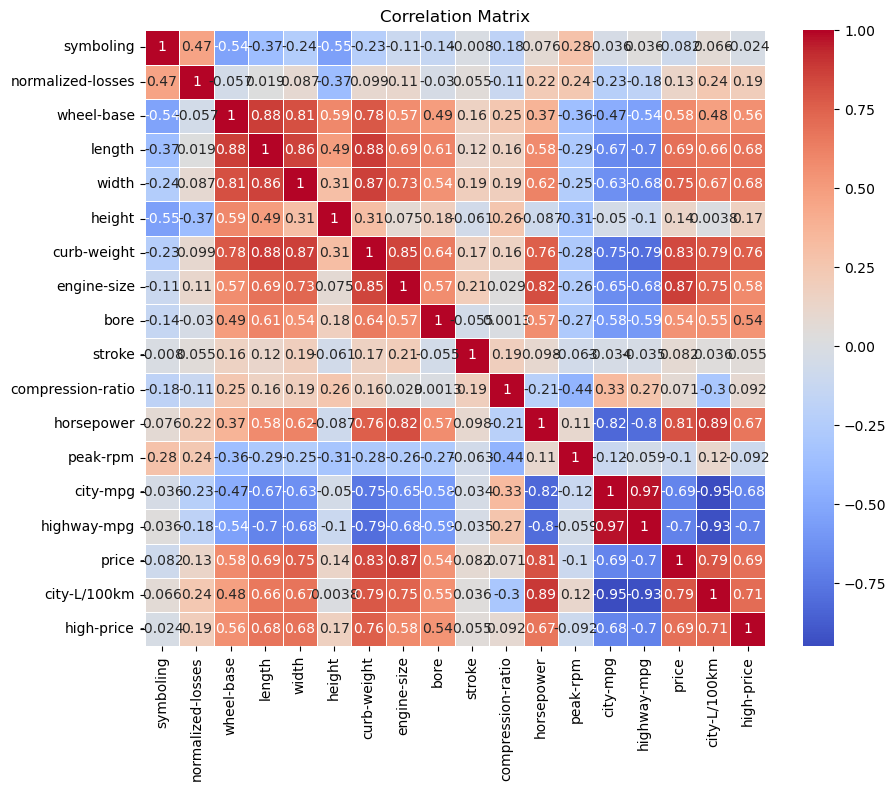

In [94]:
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numerical_columns.corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

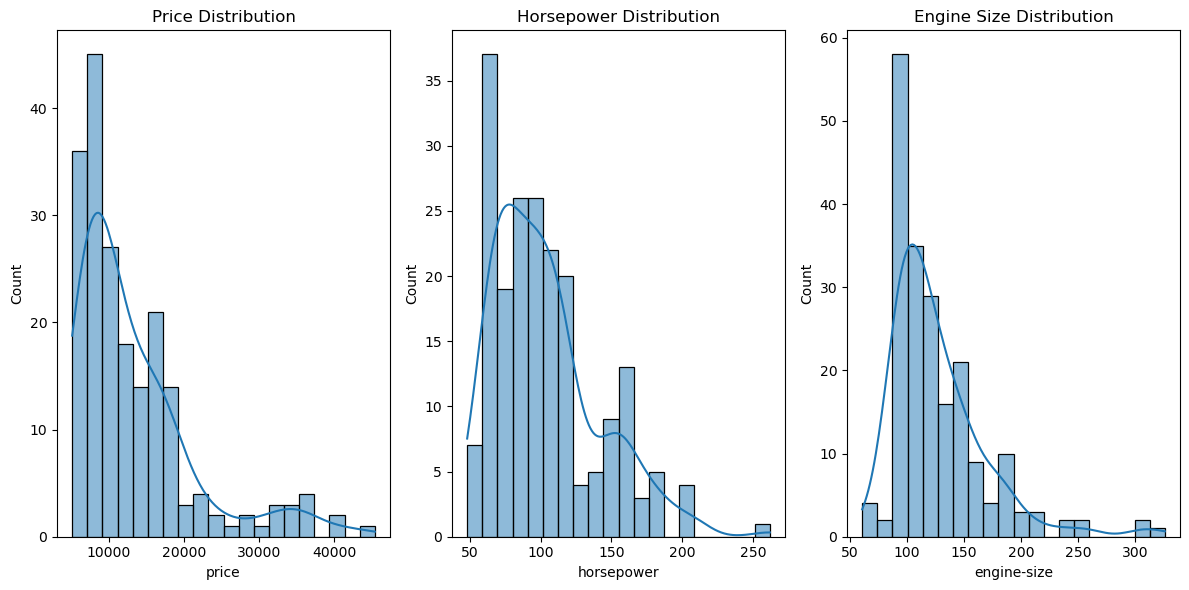

In [95]:
# Plot histogram for 'price', 'horsepower', and 'engine-size'
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(df['price'], bins=20, kde=True)
plt.title('Price Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['horsepower'], bins=20, kde=True)
plt.title('Horsepower Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['engine-size'], bins=20, kde=True)
plt.title('Engine Size Distribution')

plt.tight_layout()
plt.show()

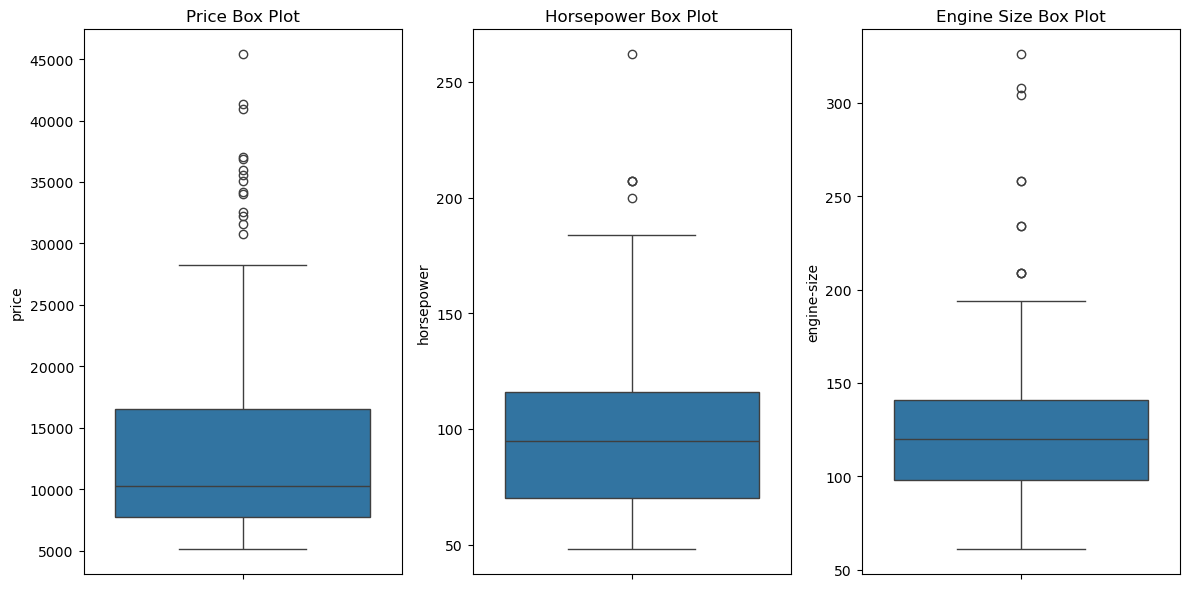

In [96]:
# Box plot for 'price', 'horsepower', and 'engine-size'
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(y=df['price'])
plt.title('Price Box Plot')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['horsepower'])
plt.title('Horsepower Box Plot')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['engine-size'])
plt.title('Engine Size Box Plot')

plt.tight_layout()
plt.show()


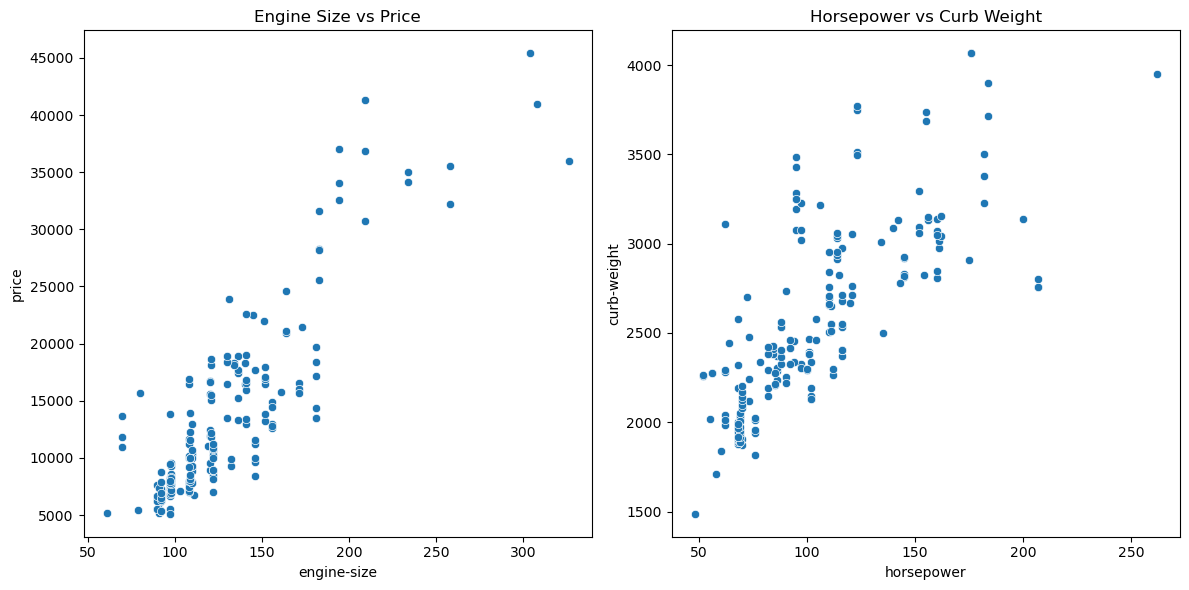

In [97]:
# Scatter plot between 'engine-size' and 'price'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=df['engine-size'], y=df['price'])
plt.title('Engine Size vs Price')

# Scatter plot between 'horsepower' and 'curb-weight'
plt.subplot(1, 2, 2)
sns.scatterplot(x=df['horsepower'], y=df['curb-weight'])
plt.title('Horsepower vs Curb Weight')

plt.tight_layout()
plt.show()


In [99]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Fill missing values in numerical columns using the mean
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# Encode categorical columns using LabelEncoder
label_encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Features (X) and Target variable (y) for 'price' prediction
X = df.drop('price', axis=1)  # Drop target variable from features
y = df['price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize Linear Regression model
lin_reg = LinearRegression()

# Fit the model
lin_reg.fit(X_train, y_train)

# Make predictions
y_pred_lin = lin_reg.predict(X_test)

# Evaluate the model
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print(f"Linear Regression MSE: {mse_lin}")
print(f"Linear Regression R²: {r2_lin}")


Linear Regression MSE: 14764592.086757803
Linear Regression R²: 0.8442416520413617


In [101]:
from sklearn.tree import DecisionTreeRegressor

# Initialize Decision Tree Regressor model
tree_reg = DecisionTreeRegressor(random_state=42)

# Fit the model
tree_reg.fit(X_train, y_train)

# Make predictions
y_pred_tree = tree_reg.predict(X_test)

# Evaluate the model
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Decision Tree MSE: {mse_tree}")
print(f"Decision Tree R²: {r2_tree}")


Decision Tree MSE: 5867127.213114754
Decision Tree R²: 0.9381050260916081


In [102]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest Regressor model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_reg.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_reg.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest R²: {r2_rf}")


Random Forest MSE: 7130139.561975307
Random Forest R²: 0.9247809385886205


Linear Regression - Mean Squared Error: 21663988.80, R-Squared: 0.77
Decision Tree - Mean Squared Error: 10153621.37, R-Squared: 0.89
Random Forest - Mean Squared Error: 8255758.18, R-Squared: 0.91


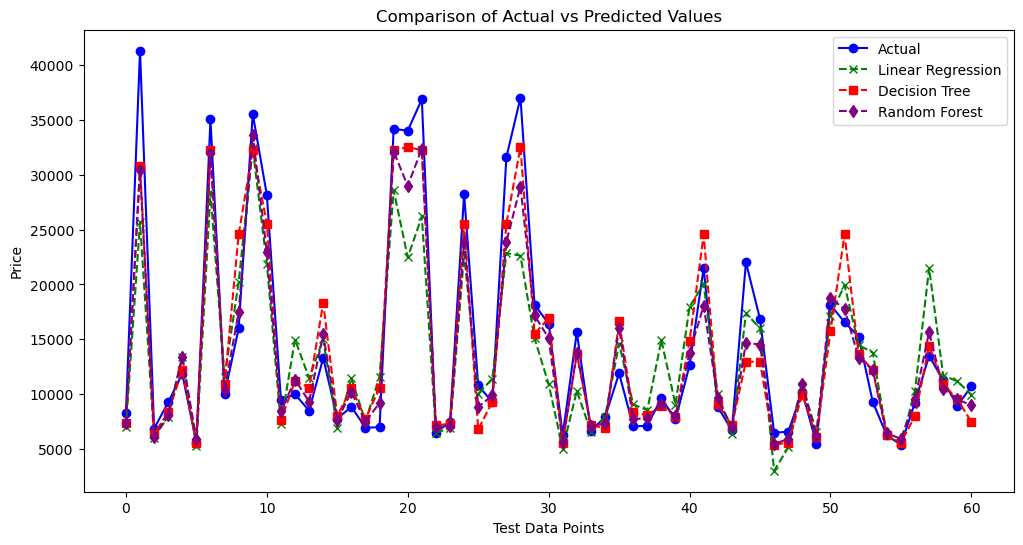

In [106]:

# Data Preprocessing: Handling missing values (if any) and selecting relevant features
df['price'].replace('?', np.nan, inplace=True)
df.dropna(subset=['price'], inplace=True)  # Remove rows with missing price

# Convert price to numeric
df['price'] = pd.to_numeric(df['price'])

# Features and Target
X = df[['engine-size', 'horsepower', 'city-mpg', 'highway-mpg', 'curb-weight']]  # Features
y = df['price']  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# 2. Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# 3. Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation: Mean Squared Error and R-Squared
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f'{model_name} - Mean Squared Error: {mse:.2f}, R-Squared: {r2:.2f}')

# Evaluate Linear Regression
evaluate_model(y_test, y_pred_lr, "Linear Regression")

# Evaluate Decision Tree
evaluate_model(y_test, y_pred_dt, "Decision Tree")

# Evaluate Random Forest
evaluate_model(y_test, y_pred_rf, "Random Forest")

# Visualize Predictions vs Actual
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', color='blue', marker='o')
plt.plot(y_pred_lr, label='Linear Regression', color='green', linestyle='--', marker='x')
plt.plot(y_pred_dt, label='Decision Tree', color='red', linestyle='--', marker='s')
plt.plot(y_pred_rf, label='Random Forest', color='purple', linestyle='--', marker='d')
plt.legend()
plt.title('Comparison of Actual vs Predicted Values')
plt.xlabel('Test Data Points')
plt.ylabel('Price')
plt.show()


In [117]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas', 'high-price'],
      dtype='object')

In [118]:
from sklearn.preprocessing import StandardScaler

# Replace '?' with NaN and convert columns to appropriate types
df.replace('?', np.nan, inplace=True)

# Convert columns to numeric where possible
df = df.apply(pd.to_numeric, errors='ignore')

# Impute missing values
df.fillna(df.mean(numeric_only=True), inplace=True)

# Normalize/Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['engine-size', 'curb-weight', 'city-mpg', 'highway-mpg']])


C:\Users\mohit\AppData\Local\Temp\ipykernel_8508\3336098122.py:7: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


C:\Users\mohit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


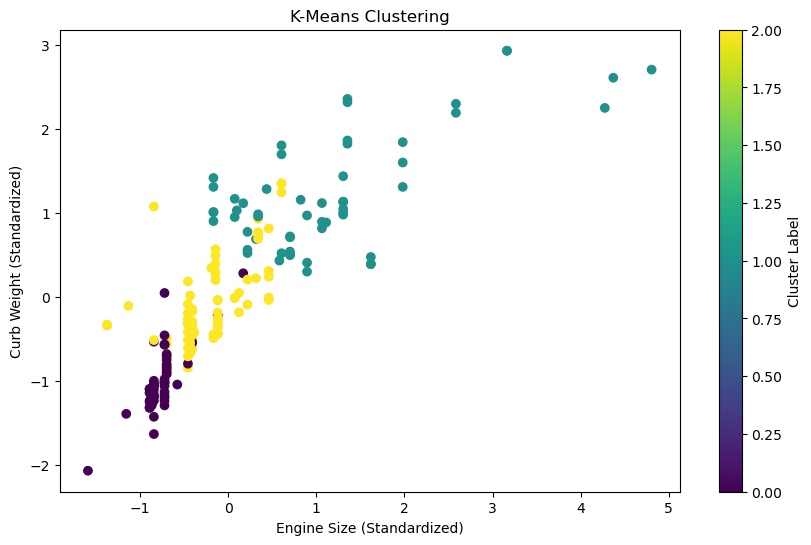

In [119]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define the number of clusters
num_clusters = 3  # You can experiment with different values

# Fit K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(scaled_features)
labels = kmeans.labels_

# Add cluster labels to DataFrame
df['Cluster'] = labels

# Visualize clusters
plt.figure(figsize=(10, 6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=labels, cmap='viridis', marker='o')
plt.title('K-Means Clustering')
plt.xlabel('Engine Size (Standardized)')
plt.ylabel('Curb Weight (Standardized)')
plt.colorbar(label='Cluster Label')
plt.show()


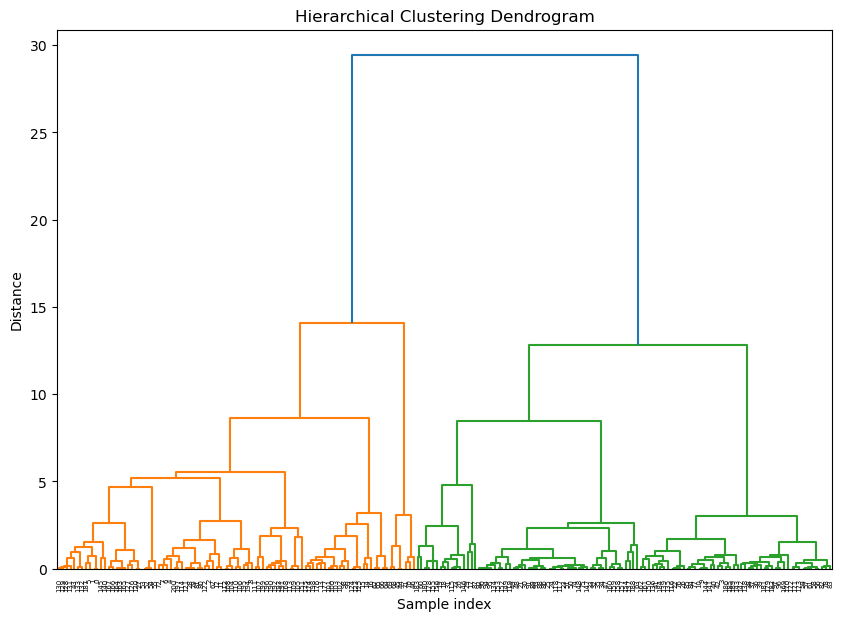

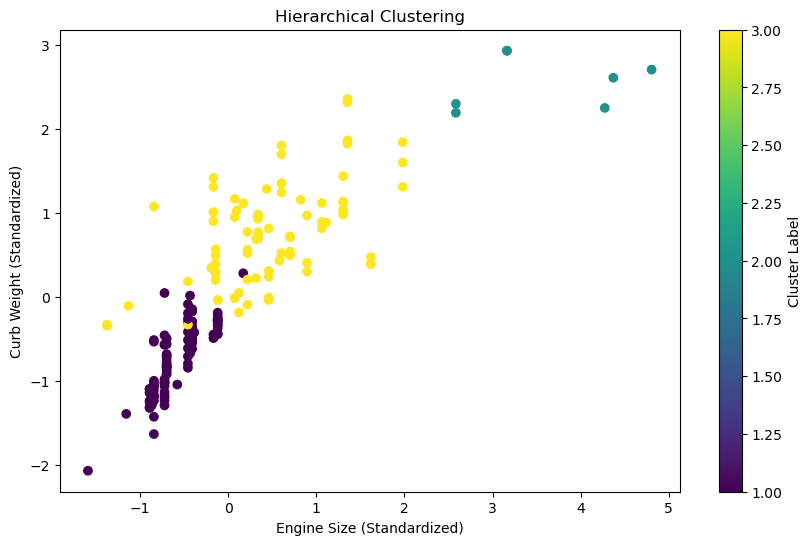

In [120]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Perform hierarchical clustering
linked = linkage(scaled_features, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Form flat clusters
num_clusters_hierarchical = 3  # Adjust this value
clusters = fcluster(linked, num_clusters_hierarchical, criterion='maxclust')

# Add cluster labels to DataFrame
df['Cluster_Hierarchical'] = clusters

# Visualize clusters
plt.figure(figsize=(10, 6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('Hierarchical Clustering')
plt.xlabel('Engine Size (Standardized)')
plt.ylabel('Curb Weight (Standardized)')
plt.colorbar(label='Cluster Label')
plt.show()


In [123]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas', 'high-price',
       'Cluster', 'Cluster_Hierarchical'],
      dtype='object')

In [124]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Replace '?' with NaN and convert columns to appropriate types
df.replace('?', np.nan, inplace=True)

# Impute missing values
imputer = SimpleImputer(strategy='most_frequent')
df[['fuel-type', 'aspiration']] = imputer.fit_transform(df[['fuel-system', 'aspiration']])

# Encode categorical variables
label_encoders = {}
for column in ['fuel-type', 'aspiration']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Define features and target
X = df[['engine-size', 'curb-weight', 'city-mpg', 'highway-mpg']]
y_fuel = df['fuel-type']  # For predicting fuel type
y_aspiration = df['aspiration']  # For predicting aspiration

# Split the dataset into training and testing sets
X_train, X_test, y_train_fuel, y_test_fuel = train_test_split(X, y_fuel, test_size=0.3, random_state=42)
X_train, X_test, y_train_aspiration, y_test_aspiration = train_test_split(X, y_aspiration, test_size=0.3, random_state=42)

# Train and evaluate Logistic Regression for fuel type
lr_fuel = LogisticRegression(max_iter=1000)
lr_fuel.fit(X_train, y_train_fuel)
y_pred_fuel = lr_fuel.predict(X_test)
print("Logistic Regression - Fuel Type")
print(f'Accuracy: {accuracy_score(y_test_fuel, y_pred_fuel):.2f}')
print(classification_report(y_test_fuel, y_pred_fuel))

# Train and evaluate Logistic Regression for aspiration
lr_aspiration = LogisticRegression(max_iter=1000)
lr_aspiration.fit(X_train, y_train_aspiration)
y_pred_aspiration = lr_aspiration.predict(X_test)
print("Logistic Regression - Aspiration")
print(f'Accuracy: {accuracy_score(y_test_aspiration, y_pred_aspiration):.2f}')
print(classification_report(y_test_aspiration, y_pred_aspiration))


Logistic Regression - Fuel Type
Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.68      0.81      0.74        21
           3       0.50      0.14      0.22         7
           5       0.76      0.96      0.85        27
           6       0.00      0.00      0.00         3

    accuracy                           0.72        61
   macro avg       0.39      0.38      0.36        61
weighted avg       0.63      0.72      0.66        61

Logistic Regression - Aspiration
Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.87      0.92      0.90        51
           1       0.43      0.30      0.35        10

    accuracy                           0.82        61
   macro avg       0.65      0.61      0.62        61
weighted avg       0.80      0.82      0.81        61



C:\Users\mohit\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mohit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mohit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels wi

In [126]:
from sklearn.tree import DecisionTreeClassifier

# Train and evaluate Decision Tree for fuel type
dt_fuel = DecisionTreeClassifier(random_state=42)
dt_fuel.fit(X_train, y_train_fuel)
y_pred_fuel_dt = dt_fuel.predict(X_test)
print("Decision Tree - Fuel Type")
print(f'Accuracy: {accuracy_score(y_test_fuel, y_pred_fuel_dt):.2f}')
print(classification_report(y_test_fuel, y_pred_fuel_dt))

# Train and evaluate Decision Tree for aspiration
dt_aspiration = DecisionTreeClassifier(random_state=42)
dt_aspiration.fit(X_train, y_train_aspiration)
y_pred_aspiration_dt = dt_aspiration.predict(X_test)
print("Decision Tree - Aspiration")
print(f'Accuracy: {accuracy_score(y_test_aspiration, y_pred_aspiration_dt):.2f}')
print(classification_report(y_test_aspiration, y_pred_aspiration_dt))


Decision Tree - Fuel Type
Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       0.90      0.90      0.90        21
           2       0.00      0.00      0.00         0
           3       0.86      0.86      0.86         7
           5       0.92      0.89      0.91        27
           6       1.00      0.67      0.80         3

    accuracy                           0.89        61
   macro avg       0.74      0.72      0.72        61
weighted avg       0.90      0.89      0.89        61

Decision Tree - Aspiration
Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        51
           1       0.60      0.60      0.60        10

    accuracy                           0.87        61
   macro avg       0.76      0.76      0.76        61
weighted avg       0.87      0.87      0.87        61



C:\Users\mohit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mohit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mohit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [127]:
from sklearn.ensemble import RandomForestClassifier

# Train and evaluate Random Forest for fuel type
rf_fuel = RandomForestClassifier(n_estimators=100, random_state=42)
rf_fuel.fit(X_train, y_train_fuel)
y_pred_fuel_rf = rf_fuel.predict(X_test)
print("Random Forest - Fuel Type")
print(f'Accuracy: {accuracy_score(y_test_fuel, y_pred_fuel_rf):.2f}')
print(classification_report(y_test_fuel, y_pred_fuel_rf))

# Train and evaluate Random Forest for aspiration
rf_aspiration = RandomForestClassifier(n_estimators=100, random_state=42)
rf_aspiration.fit(X_train, y_train_aspiration)
y_pred_aspiration_rf = rf_aspiration.predict(X_test)
print("Random Forest - Aspiration")
print(f'Accuracy: {accuracy_score(y_test_aspiration, y_pred_aspiration_rf):.2f}')
print(classification_report(y_test_aspiration, y_pred_aspiration_rf))


Random Forest - Fuel Type
Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.87      0.95      0.91        21
           2       0.00      0.00      0.00         0
           3       1.00      0.86      0.92         7
           5       0.96      0.93      0.94        27
           6       1.00      1.00      1.00         3

    accuracy                           0.90        61
   macro avg       0.72      0.68      0.70        61
weighted avg       0.91      0.90      0.91        61

Random Forest - Aspiration
Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        51
           1       0.86      0.60      0.71        10

    accuracy                           0.92        61
   macro avg       0.89      0.79      0.83        61
weighted avg       0.91      0.92      0.91        61



C:\Users\mohit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mohit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mohit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [128]:
from sklearn.metrics import accuracy_score

# Predictions
y_pred_lr_fuel = lr_fuel.predict(X_test)
y_pred_dt_fuel = dt_fuel.predict(X_test)
y_pred_rf_fuel = rf_fuel.predict(X_test)

y_pred_lr_aspiration = lr_aspiration.predict(X_test)
y_pred_dt_aspiration = dt_aspiration.predict(X_test)
y_pred_rf_aspiration = rf_aspiration.predict(X_test)

# Calculate accuracy
accuracy_scores_fuel = {
    'Logistic Regression': accuracy_score(y_test_fuel, y_pred_lr_fuel),
    'Decision Tree': accuracy_score(y_test_fuel, y_pred_dt_fuel),
    'Random Forest': accuracy_score(y_test_fuel, y_pred_rf_fuel)
}

accuracy_scores_aspiration = {
    'Logistic Regression': accuracy_score(y_test_aspiration, y_pred_lr_aspiration),
    'Decision Tree': accuracy_score(y_test_aspiration, y_pred_dt_aspiration),
    'Random Forest': accuracy_score(y_test_aspiration, y_pred_rf_aspiration)
}


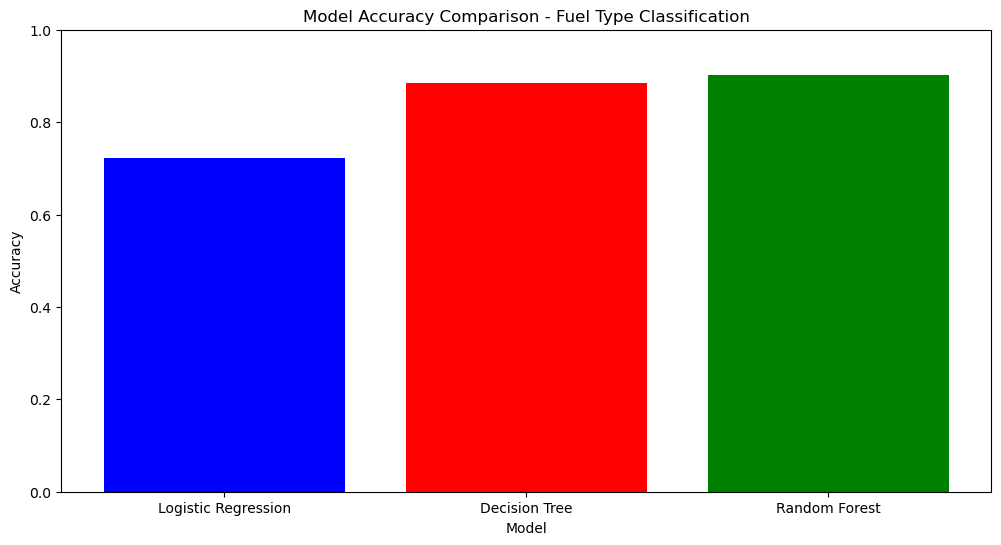

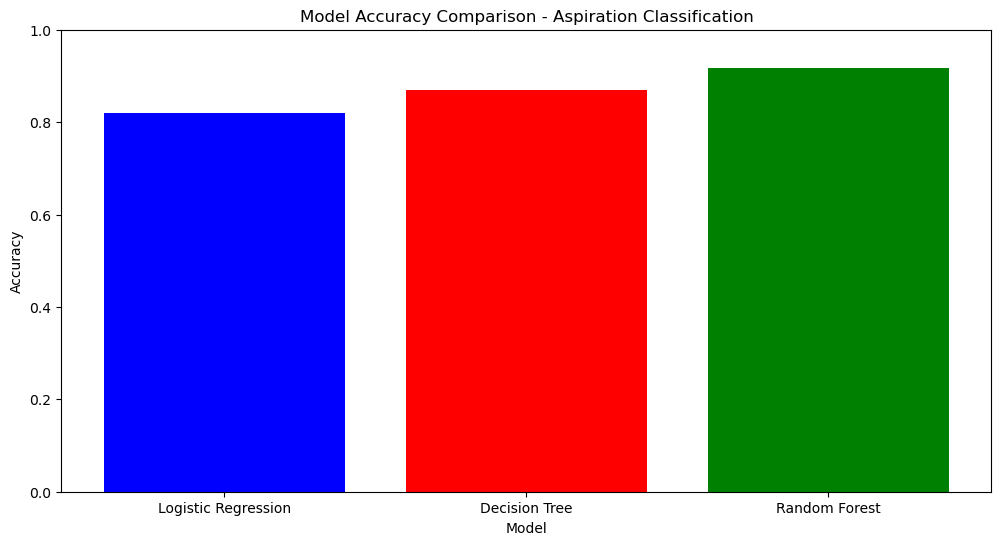

In [129]:
import matplotlib.pyplot as plt

# Plot for Fuel Type
plt.figure(figsize=(12, 6))
plt.bar(accuracy_scores_fuel.keys(), accuracy_scores_fuel.values(), color=['blue', 'red', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison - Fuel Type Classification')
plt.ylim([0, 1])
plt.show()

# Plot for Aspiration
plt.figure(figsize=(12, 6))
plt.bar(accuracy_scores_aspiration.keys(), accuracy_scores_aspiration.values(), color=['blue', 'red', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison - Aspiration Classification')
plt.ylim([0, 1])
plt.show()
